In [23]:
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy as np
import matplotlib.pyplot as plt

ts = np.load(
    "C:/Users/esteb/OneDrive/Documents/Escuela/Robótica/Fuzzy/anfis/anfis/datos.npy")[:-10]

# Normalize
#ts = ts / ts.max(axis=0)

# Datos

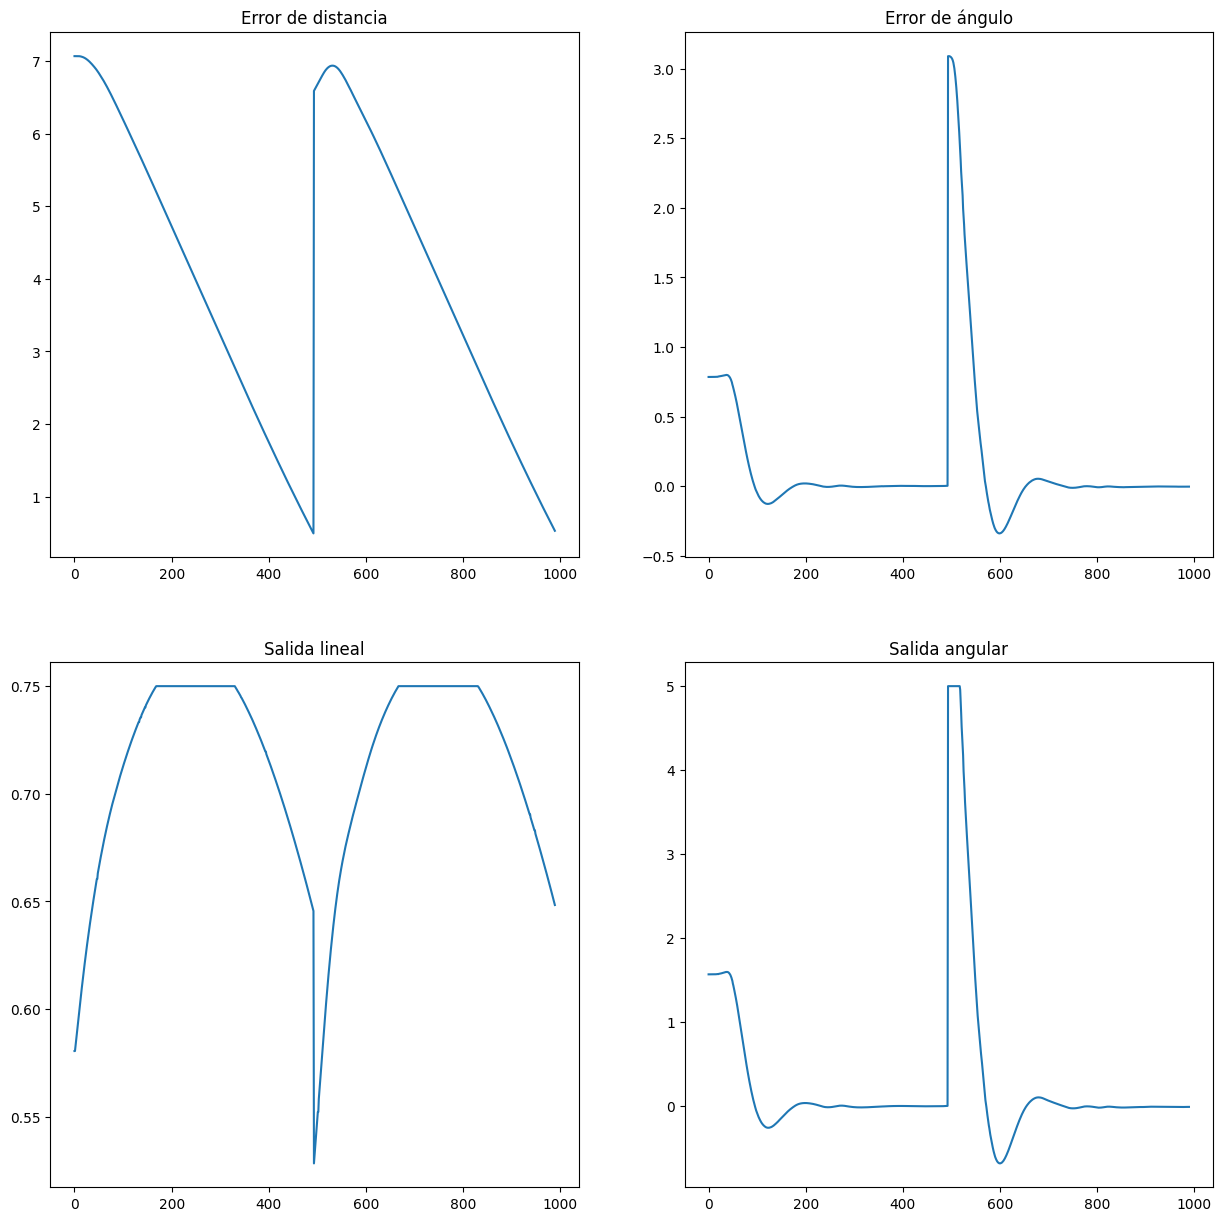

In [24]:


plt.subplots_adjust()
plt.subplot(2, 2, 1)
plt.plot(ts[:, 0])
plt.title("Error de distancia")

plt.subplot(2, 2, 2)
plt.plot(ts[:, 1])
plt.title("Error de ángulo")

plt.subplot(2, 2, 3)
plt.plot(ts[:, 2])
plt.title("Salida lineal")

plt.subplot(2, 2, 4)
plt.plot(ts[:, 3])
plt.title("Salida angular")


plt.gcf().set_size_inches(15, 15)
plt.show()

# Generador de pruebas

In [33]:
def test(X, Y, mfs, type, epochs=20, print_mfs = False, k = 0.0005):
	nx = np.linspace(np.min(X), np.max(X), mfs)
	ny = np.linspace(min(Y), max(Y), mfs)

	mfx = []
	mfy = []

	for i in range(mfs):
		if type == "gaussmf":
			mfx.append(['gaussmf', {'mean': np.round(nx[i], 1),
					'sigma': np.round((np.max(X)-np.min(X))/2, 1)}])
			mfy.append(['gaussmf', {'mean': np.round(ny[i], 1),
					'sigma': np.round((max(Y)-min(Y))/2, 1)}])
		elif type == "gbellmf":
			mfx.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(nx[i], 1)}])
			mfy.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(ny[i], 1)}])
		elif type == "sigmf":
			mfx.append(['sigmf', {'b': np.round(nx[i], 1), 'c': 1}])
			mfy.append(['sigmf', {'b': np.round(ny[i], 1), 'c': 1}])
			
	mf = [mfx, mfy]

	mfc = membership.membershipfunction.MemFuncs(mf)

	anf = anfis.ANFIS(X, Y, mfc)

	anf.trainHybridJangOffLine(epochs=epochs, k = k, print_mfs = print_mfs)

	print("Plotting errors")
	anf.plotErrors()
	print("Plotting results")
	anf.plotResults()


# Controlador Angular

In [42]:
X = ts[:, 0:2]
Y = ts[:, 3]

## Gaussian MFs

### 3 MFs

1) MSEe: 0.43745666020148954
2) MSEe: 0.25774050393854264
3) MSEe: 0.27251412449376083
4) MSEe: 0.2688375814648011
5) MSEe: 0.264172915428516
6) MSEe: 0.2586404446260323
7) MSEe: 0.25148923219100344
8) MSEe: 0.2423684014673081
9) MSEe: 0.23106306231227386
10) MSEe: 0.21758845773933852
11) MSEe: 0.20221423475981118
12) MSEe: 0.18552021624516357
13) MSEe: 0.16895718602441218
14) MSEe: 0.15749716078785778
15) MSEe: 0.17123781181028616
16) MSEe: 0.18900122025205146
17) MSEe: 0.1933450668943007
18) MSEe: 0.18042302619720813
19) MSEe: 0.19278502001559383
Min error: 0.15749716078785778 at epoch 14
Plotting errors


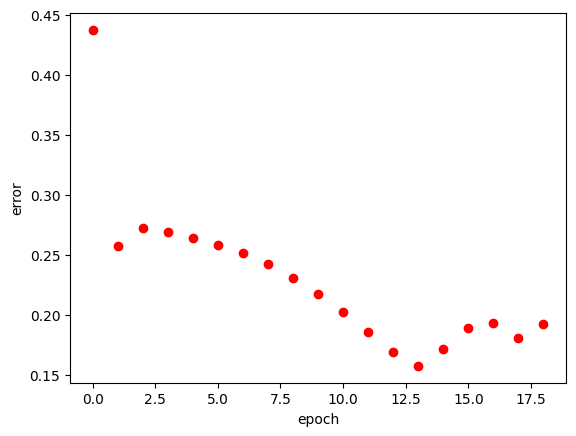

Plotting results


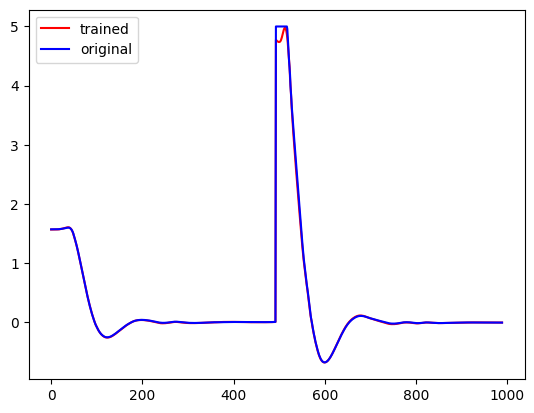

In [45]:
test(X, Y, 3, "gaussmf", k = 0.1)

### 4 MFs

1) MSEe: 0.5784815200766498
2) MSEe: 0.5395626452475721
3) MSEe: 0.5082920361339976
4) MSEe: 0.48171995111111526
5) MSEe: 0.4557224829419841
6) MSEe: 0.42875474756104004
7) MSEe: 0.39807833919258595
8) MSEe: 0.3599677865471235
9) MSEe: 0.31256297906853214
10) MSEe: 0.26070315827611795
11) MSEe: 0.2148517107819522
12) MSEe: 0.1840753072165138
13) MSEe: 0.174065536101858
14) MSEe: 0.18211824565125945
15) MSEe: 0.1822724885776399
16) MSEe: 0.22584250108794726
17) MSEe: 0.1261768868850319
18) MSEe: 0.11755071522276991
19) MSEe: 0.17105759701374568
Min error: 0.11755071522276991 at epoch 18
Plotting errors


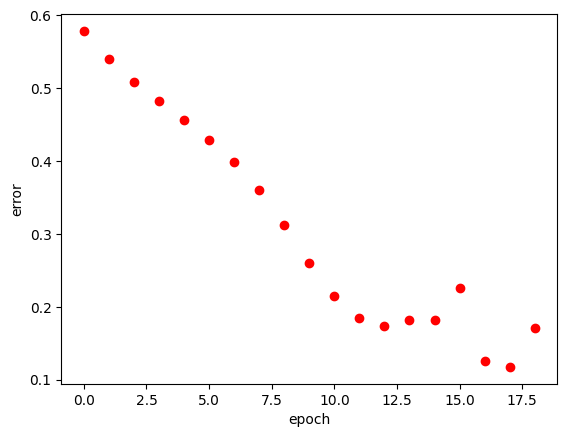

Plotting results


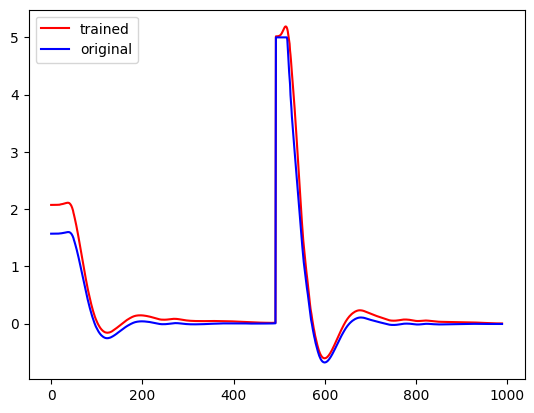

In [51]:
test(X, Y, 4, "gaussmf", k = 0.15)


### 5 MFs

1) MSEe: 0.7838636653600752
2) MSEe: 0.5087842423650041
3) MSEe: 0.3481737211494206
4) MSEe: 0.23125694774653946
5) MSEe: 0.19064484136055493
6) MSEe: 0.15420031279346963
7) MSEe: 0.15570325805837437
8) MSEe: 0.18555179731055124
9) MSEe: 0.1807580745506493
10) MSEe: 0.1718257685222018
11) MSEe: 0.15051384534129272
12) MSEe: 0.1587634472709527
13) MSEe: 0.20468907695808264
14) MSEe: 0.17140343405155695
15) MSEe: 0.1850134109390289
16) MSEe: 0.15830021569990205
17) MSEe: 0.177229476405331
18) MSEe: 0.22052615748752652
19) MSEe: 0.5611337042080929
Min error: 0.15051384534129272 at epoch 11
Plotting errors


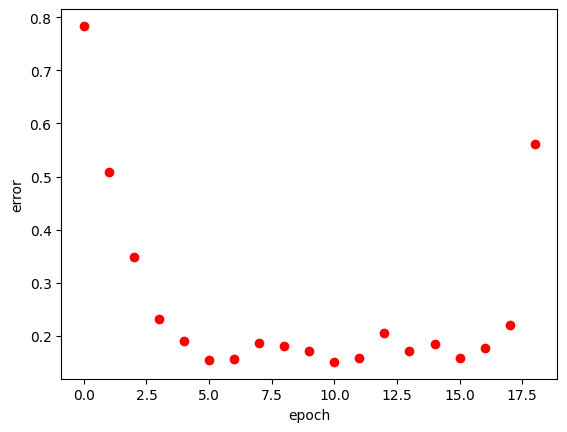

Plotting results


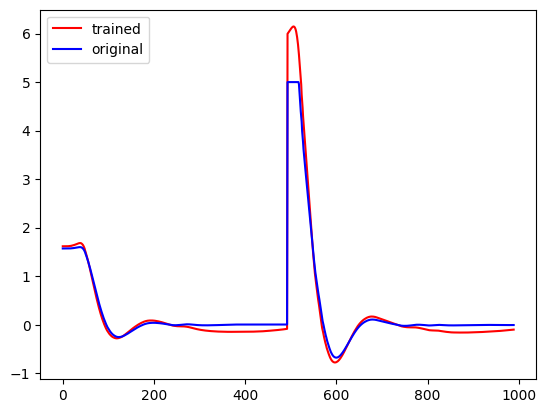

In [54]:
test(X, Y, 5, "gaussmf", k = 0.5)


## Generalized Bell MFs

### 3 MFs

1) MSEe: 0.15975919056874321
2) MSEe: 0.1534504147971184
3) MSEe: 0.15771497107217214
4) MSEe: 0.1624427824959296
5) MSEe: 0.16117795726091977
6) MSEe: 0.16018199213685236
7) MSEe: 0.1592999723489181
8) MSEe: 0.15799398957036845
9) MSEe: 0.15263590412551145
10) MSEe: 0.14817127682627615
11) MSEe: 0.14575494256810267
12) MSEe: 0.1451466140826066
13) MSEe: 0.1469449567178587
14) MSEe: 0.1515606322604385
15) MSEe: 0.15928430364572624
16) MSEe: 0.17014334209869747
17) MSEe: 0.18374760431704457
18) MSEe: 1.894994689784451
19) MSEe: 1.7803357935327877
Min error: 0.1451466140826066 at epoch 12
Plotting errors


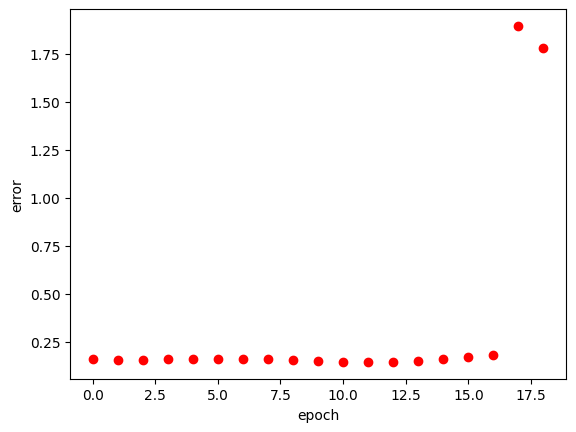

Plotting results


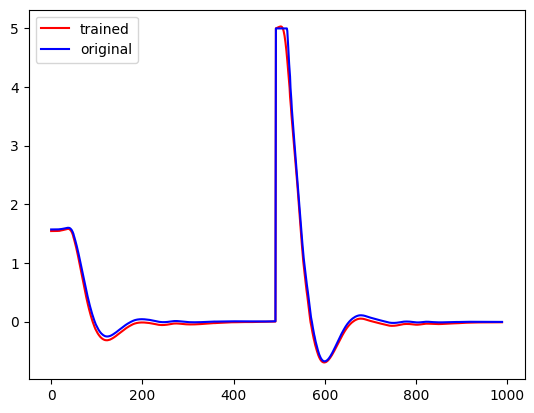

In [56]:
test(X, Y, 3, "gbellmf", k = 0.05)


### 4 MFs

1) MSEe: 0.16875835235695838
2) MSEe: 0.1698976557567003
3) MSEe: 0.17101720439288162
4) MSEe: 0.17210776941829567
5) MSEe: 0.1731582354804302
6) MSEe: 0.1741546746060275
7) MSEe: 0.17507930161453278
8) MSEe: 0.17590891177213416
9) MSEe: 0.17660987791585758
10) MSEe: 0.17712741711861182
11) MSEe: 0.17738600332875987
12) MSEe: 0.1772334499438816
13) MSEe: 0.17629769649216034
14) MSEe: 0.17327457937037344
15) MSEe: 0.15304439161351008
16) MSEe: 0.1938692609783862
17) MSEe: 0.19398579669553973
18) MSEe: 0.19346973348669985
19) MSEe: 0.19263273922469798
Min error: 0.15304439161351008 at epoch 15
Plotting errors


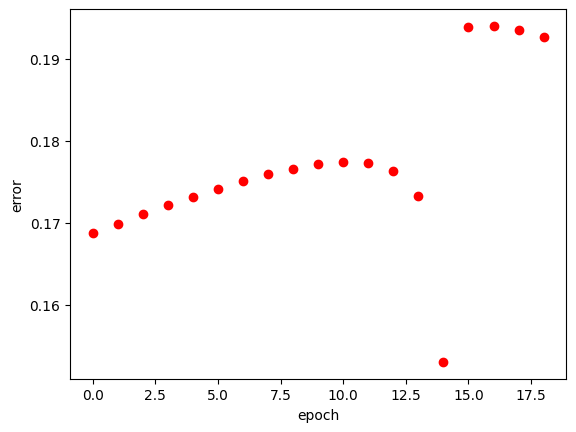

Plotting results


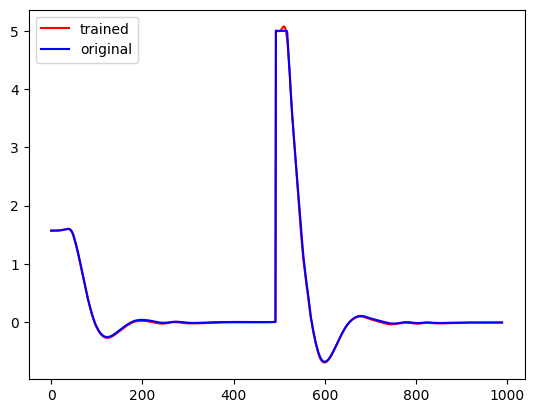

In [59]:
test(X, Y, 4, "gbellmf", k = 0.06)

### 5 MFs

In [62]:
test(X, Y, 5, "gbellmf", k = 1)

1) MSEe: 0.11477520846433652


## Sigmoid MFs

### 3 MFs

current error: 0.3733242796093228
current error: 0.3666529129219225
current error: 0.3599686502847712
current error: 0.35328077553366743
current error: 0.34594245810094104
current error: 0.33789137545784387
current error: 0.32904475727962845
current error: 0.31928020565205684
current error: 0.30839733242848033
current error: 0.29603449540828897
current error: 0.2814559180111668
current error: 0.2628125856805966
current error: 0.23219121359593642
current error: 0.20400205384534997
current error: 0.1979831574112374
current error: 0.1932145339335944
current error: 0.18921648831941512
current error: 0.1857439851828657
current error: 0.18265155484605583
Plotting errors


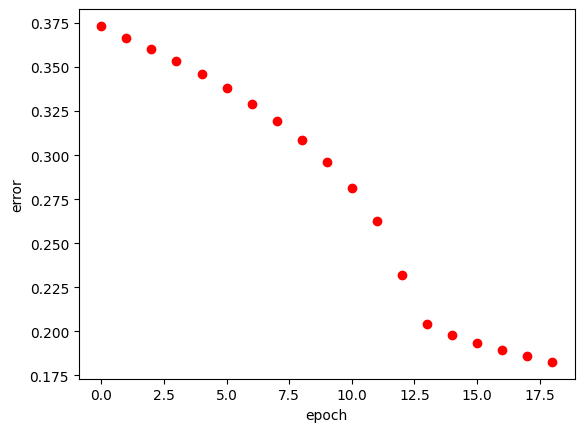

Plotting results


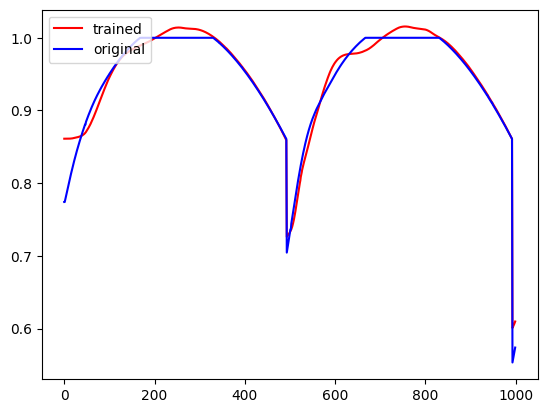

In [ ]:
test(X, Y, 3, "sigmf")

### 4 MFs

current error: 0.567236887750423
current error: 0.5543258199903849
current error: 0.5412624706486961
current error: 0.528079687372169
current error: 0.5135099702495776
current error: 0.4974275493980944
current error: 0.47967574396953705
current error: 0.46002455168125655
current error: 0.43806404004364347
current error: 0.41290242164905466
current error: 0.3820495916661159
current error: 0.3335873038835927
current error: 0.27583665934689255
current error: 0.265722343055708
current error: 0.25697812654843355
current error: 0.24916884795419245
current error: 0.24205746503596184
current error: 0.23549883121507315
current error: 0.22939663471294025
Plotting errors


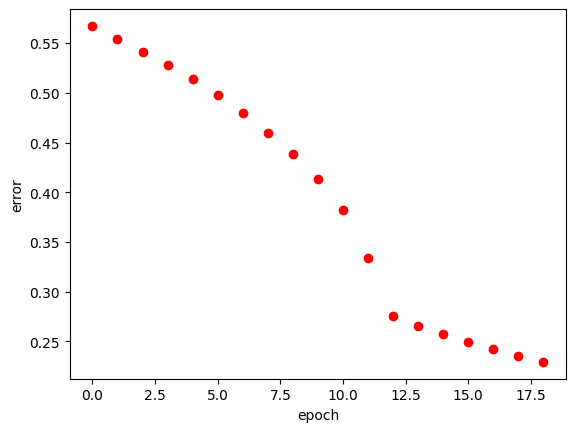

Plotting results


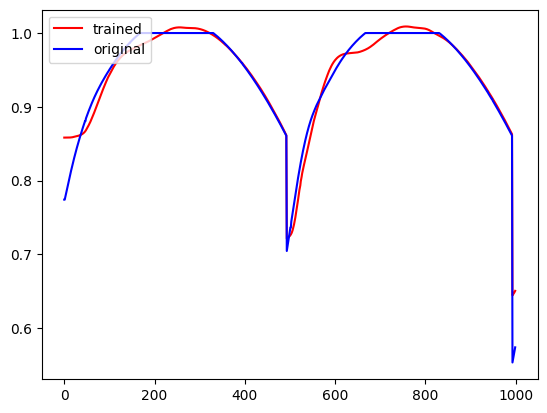

In [ ]:
test(X, Y, 4, "sigmf")

### 5 MFs

current error: 0.7176921144010564
current error: 0.702220445495394
current error: 0.6863183608133048
current error: 0.6700019837936229
current error: 0.6516394787175045
current error: 0.6309469305390832
current error: 0.6075617391370746
current error: 0.5809657013919114
current error: 0.550278608304073
current error: 0.513581550159494
current error: 0.4645942769513739
current error: 0.32730009594823906
current error: 0.3194249183159928
current error: 0.3117782254844646
current error: 0.3043245722560842
current error: 0.2970406643669921
current error: 0.2899119741624408
current error: 0.282930421095435
current error: 0.276092680578146
Plotting errors


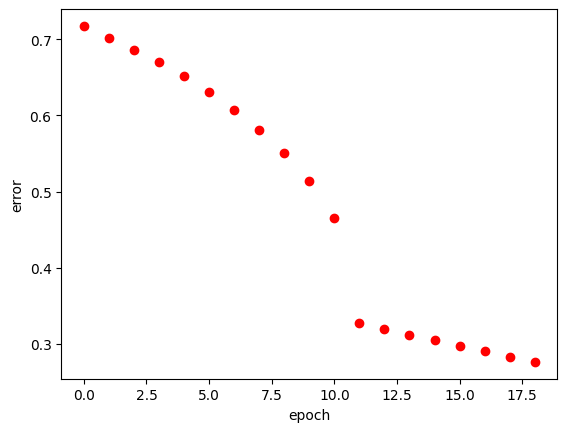

Plotting results


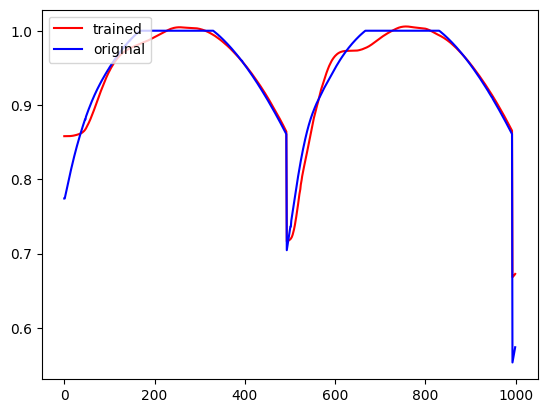

In [ ]:
test(X, Y, 5, "sigmf")


# Análisis de resultados

1) MSEe: 0.02041278121683615
2) MSEe: 0.019744262478953632
3) MSEe: 0.019760394750231558
4) MSEe: 0.01898240963123996
5) MSEe: 0.016305154370760938
6) MSEe: 0.013002407506556705
7) MSEe: 0.012985577669381429
8) MSEe: 0.012723670412162037
9) MSEe: 0.012194760415825685
10) MSEe: 0.01171450712641144
11) MSEe: 0.011660570661445095
12) MSEe: 0.011227015468434132
13) MSEe: 0.01072896517383418
14) MSEe: 0.010245983370115046
15) MSEe: 0.009773653118333878
16) MSEe: 0.009266473690294433
Min error: 0.009266473690294433 at epoch 16
Plotting errors


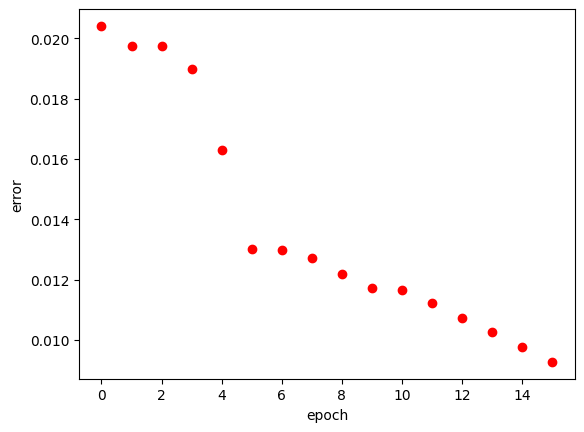

Plotting results


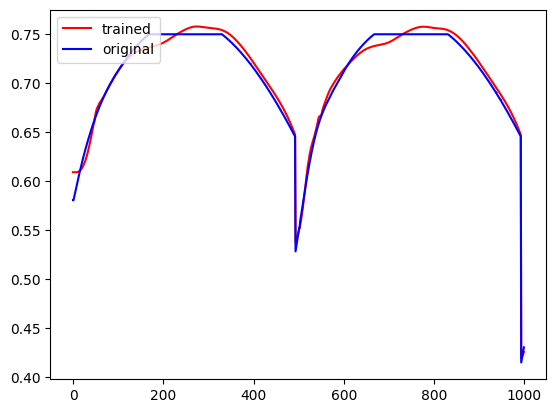

In [ ]:
test(X, Y, 5, "gbellmf", epochs = 18, k = 0.1)
